Preliminary Data Analysis on selected city networks from https://github.com/bstabler/TransportationNetworks.

Degree distribution, diameter, and clustering coefficient will be calculated

#Imports

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Importing Data

In [ ]:
Sydney = pd.read_csv("/content/drive/MyDrive/Spring 24/Network/CEE520 COS520 Project/CSV_networks/Sydney.csv")
SiouxFalls = pd.read_csv("/content/drive/MyDrive/Spring 24/Network/CEE520 COS520 Project/CSV_networks/SiouxFalls.csv")
Anaheim = pd.read_csv("/content/drive/MyDrive/Spring 24/Network/CEE520 COS520 Project/CSV_networks/Anaheim.csv")


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Spring 24/Network/CEE520 COS520 Project/CSV_networks/Sydney.csv'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Meet's stuff
Sydney = pd.read_csv("/content/drive/MyDrive/CEE520 COS520 Project/CSV_networks/Sydney.csv")
SiouxFalls = pd.read_csv("/content/drive/MyDrive/CEE520 COS520 Project/CSV_networks/SiouxFalls.csv")
Anaheim = pd.read_csv("/content/drive/MyDrive/CEE520 COS520 Project/CSV_networks/Anaheim.csv")
BerlinFriedrichshain = pd.read_csv("/content/drive/MyDrive/CEE520 COS520 Project/CSV_networks/Berlin-Friedrichshain.csv")
BerlinMitteCenter = pd.read_csv("/content/drive/MyDrive/CEE520 COS520 Project/CSV_networks/Berlin-Mitte-Center.csv")
Barcelona = pd.read_csv("/content/drive/MyDrive/CEE520 COS520 Project/CSV_networks/Barcelona.csv")
EasternMassachusetts = pd.read_csv("/content/drive/MyDrive/CEE520 COS520 Project/CSV_networks/Eastern-Massachusetts.csv")
Winnipeg = pd.read_csv("/content/drive/MyDrive/CEE520 COS520 Project/CSV_networks/Winnipeg.csv")

In [ ]:
Sydney.head()

,Unnamed: 0,init_node,term_node,capacity,length,free_flow_time,b,power,speed,critical_speed,lanes
0,0,1,6706,2880,0.904,2.26,0.25,4,24,19.2,2
1,1,2,33087,2880,0.027,0.07,0.25,4,24,19.2,2
2,2,3,30799,2880,0.257,0.64,0.25,4,24,19.2,2
3,3,4,30800,2880,0.123,0.31,0.25,4,24,19.2,2
4,4,5,6692,2880,0.068,0.17,0.25,4,24,19.2,2


# Functions

In [ ]:
def analyze_graph(G):
    # Check if the graph is connected; this is required to compute the diameter
    if nx.is_connected(G):
        diameter = nx.diameter(G)
        print(f"Diameter of the graph: {diameter}")
    else:
        print("Graph is not connected; diameter of the giant component will be calculated.")
        # Find the largest connected component (giant component)
        giant_component = max(nx.connected_components(G), key=len)
        G_giant = G.subgraph(giant_component).copy()

        # Diameter of the giant component
        diameter = nx.diameter(G_giant)
        print(f"Diameter of the giant component: {diameter}")


    # Average Clustering Coefficient
    avg_clustering = nx.average_clustering(G)
    print(f"Average Clustering Coefficient: {avg_clustering}")

    # Degree Distribution
    degrees = [G.degree(n) for n in G.nodes()]
    degree_counts = np.bincount(degrees)
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(degree_counts)), degree_counts, width=0.80, color='b')
    plt.title("Degree Distribution")
    plt.xlabel("Degree")
    plt.ylabel("Frequency")
    plt.show()


# Anaheim

In [ ]:
# Turns Anaheim into a graph object
ana_net = nx.Graph()

# Add edges with attributes
for idx, row in Anaheim.iterrows():
    ana_net.add_edge(row['init_node'], row['term_node'], **row.drop(['init_node', 'term_node']).to_dict())

Diameter of the graph: 26
Average Clustering Coefficient: 0.10764652014652022


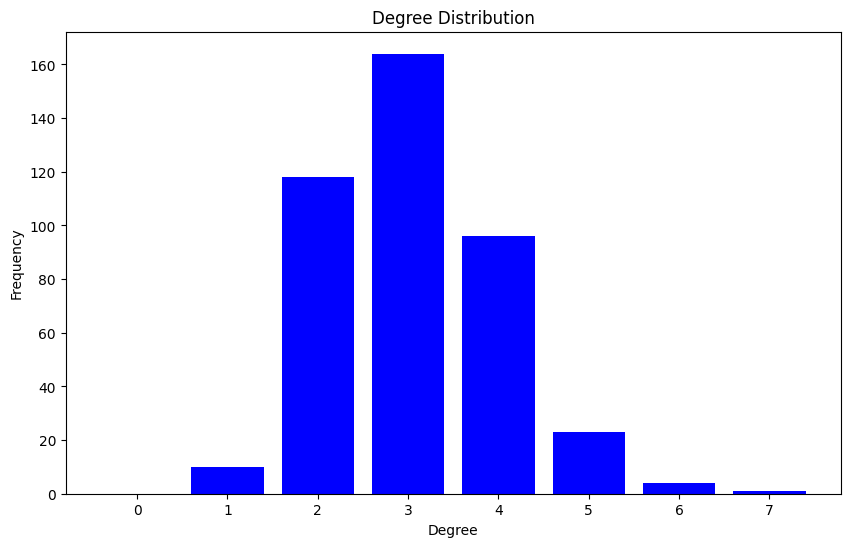

In [ ]:
analyze_graph(ana_net)

In [ ]:
nx.degree_assortativity_coefficient(ana_net)

-0.04945459017401636

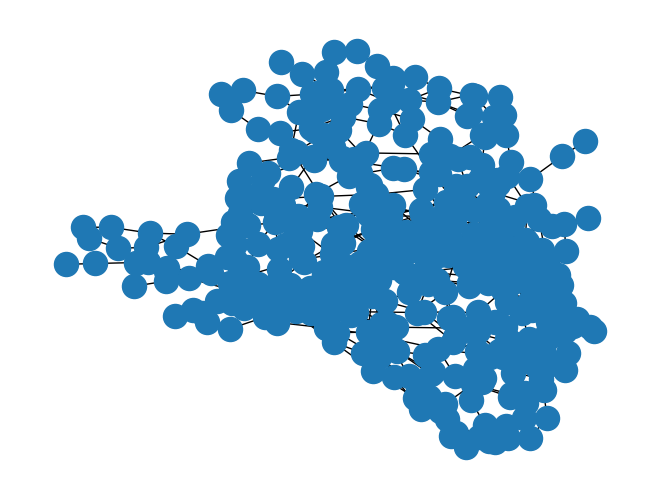

In [ ]:
nx.draw(ana_net)

# Barcelona

In [ ]:
# Turns Barcelona into a graph object
bar_net = nx.Graph()

# Add edges with attributes
for idx, row in Barcelona.iterrows():
    bar_net.add_edge(row['init_node'], row['term_node'], **row.drop(['init_node', 'term_node']).to_dict())

Diameter of the graph: 27
Average Clustering Coefficient: 0.09019119172344989


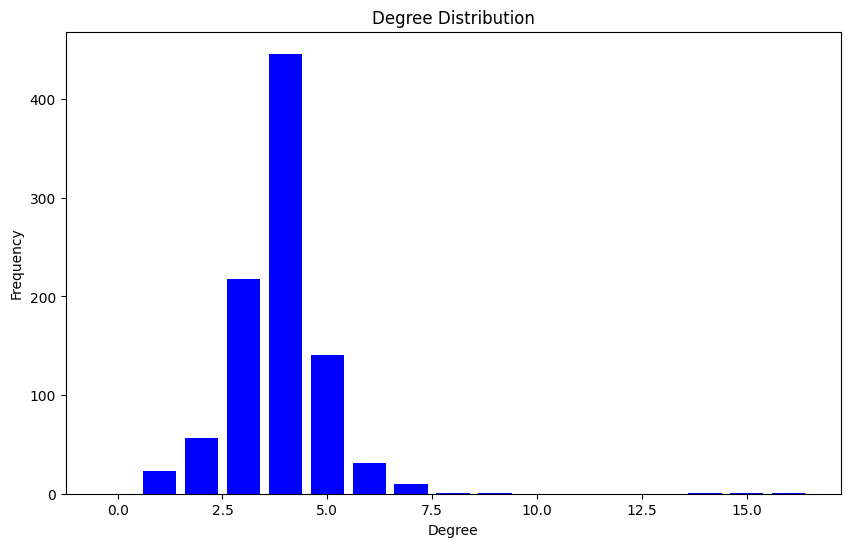

In [ ]:
analyze_graph(bar_net)

In [ ]:
nx.degree_assortativity_coefficient(bar_net)

-0.203630507112528

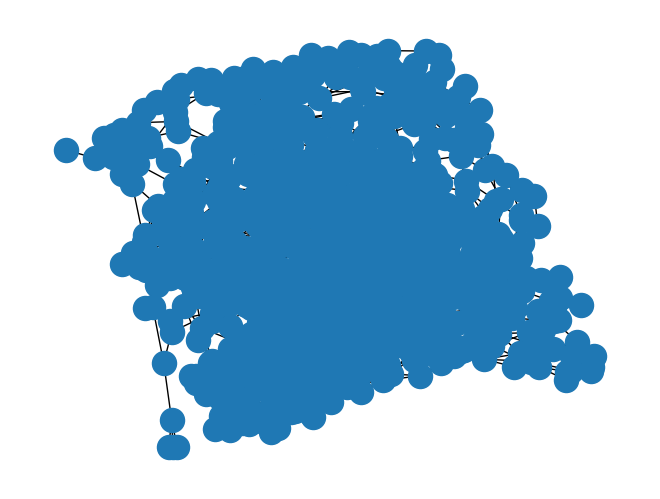

In [ ]:
nx.draw(bar_net)

# Berlin-Friedrichshain

In [ ]:
# Turns Berlin-Friedrichshain into a graph object
bf_net = nx.Graph()

# Add edges with attributes
for idx, row in BerlinFriedrichshain.iterrows():
    bf_net.add_edge(row['init_node'], row['term_node'], **row.drop(['init_node', 'term_node']).to_dict())

Diameter of the graph: 23
Average Clustering Coefficient: 0.19152848639455788


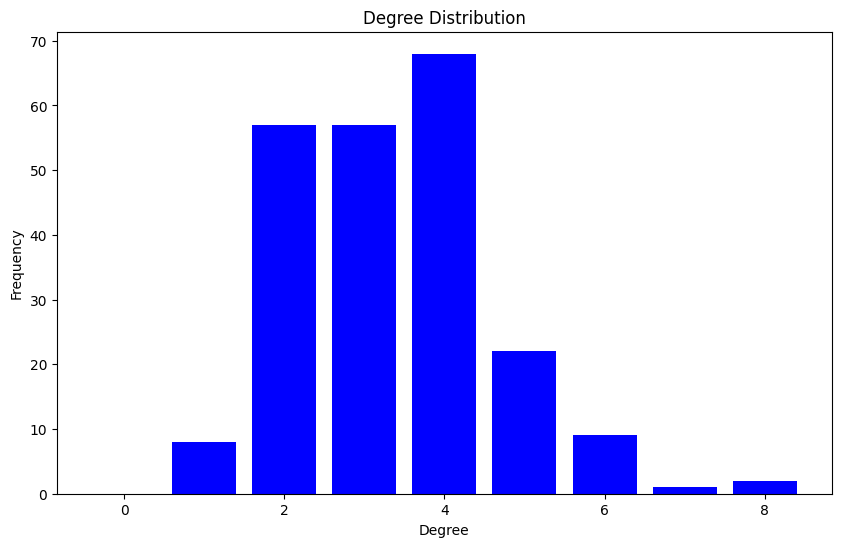

In [ ]:
analyze_graph(bf_net)

In [ ]:
nx.degree_assortativity_coefficient(bf_net)

-0.13975075480182478

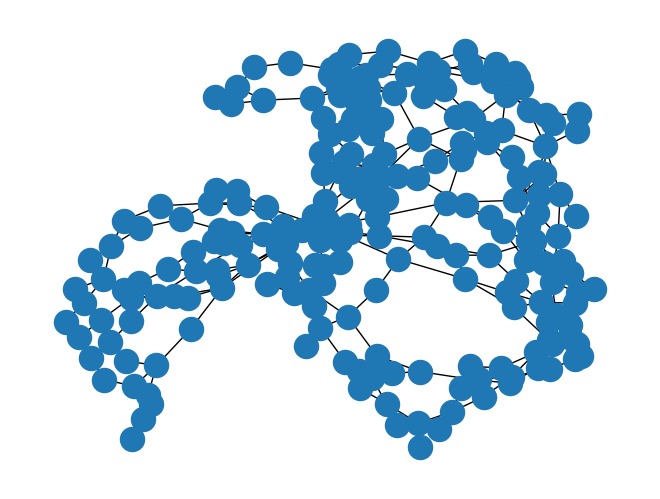

In [ ]:
nx.draw(bf_net)

# Berlin-Mitte-Center

In [ ]:
# Turns Berlin-Mitte-Center into a graph object
bmc_net = nx.Graph()

# Add edges with attributes
for idx, row in BerlinMitteCenter.iterrows():
    bmc_net.add_edge(row['init_node'], row['term_node'], **row.drop(['init_node', 'term_node']).to_dict())

Diameter of the graph: 29
Average Clustering Coefficient: 0.20476790212306575


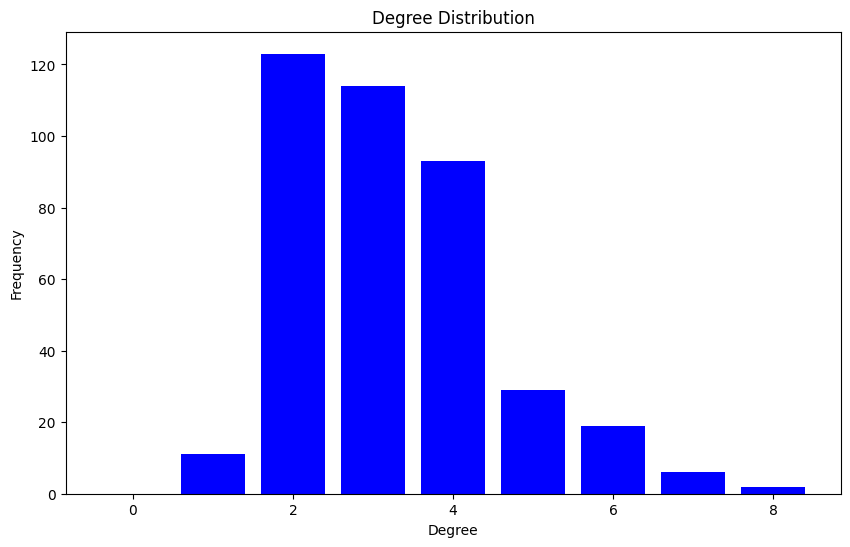

In [ ]:
analyze_graph(bmc_net)

In [ ]:
nx.degree_assortativity_coefficient(bmc_net)

-0.009176689672383782

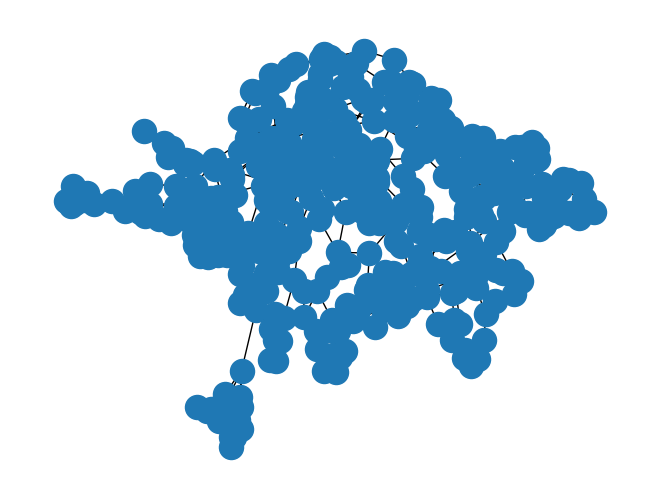

In [ ]:
nx.draw(bmc_net)

# Eastern-Massachusetts

In [ ]:
# Turns Eastern-Massachusetts into a graph object
em_net = nx.Graph()

# Add edges with attributes
for idx, row in EasternMassachusetts.iterrows():
    em_net.add_edge(row['init_node'], row['term_node'], **row.drop(['init_node', 'term_node']).to_dict())

Diameter of the graph: 9
Average Clustering Coefficient: 0.28694376194376203


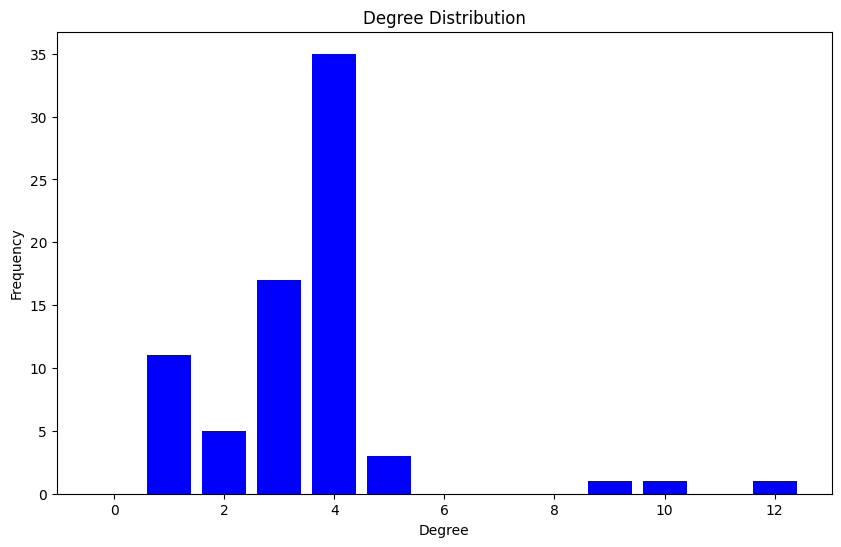

In [ ]:
analyze_graph(em_net)

In [ ]:
nx.degree_assortativity_coefficient(em_net)

-0.16869190077551302

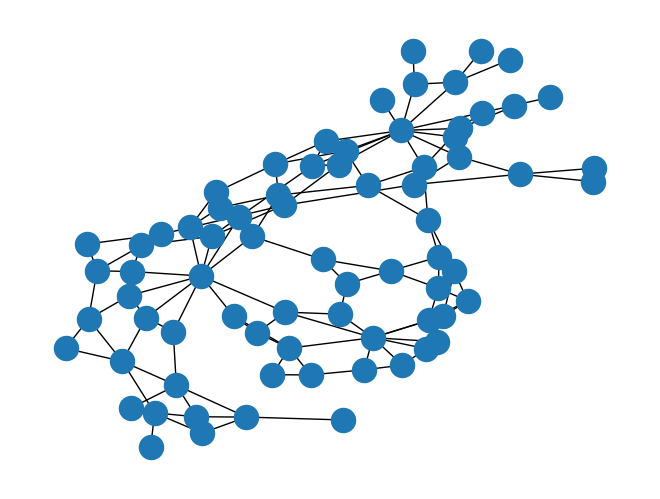

In [ ]:
nx.draw(em_net)

# Sioux Falls

In [ ]:
# Turns Sioux Falls into a graph object
sioux_net = nx.Graph()

# Add edges with attributes
for idx, row in SiouxFalls.iterrows():
    sioux_net.add_edge(row['init_node'], row['term_node'], **row.drop(['init_node', 'term_node']).to_dict())

Diameter of the graph: 6
Average Clustering Coefficient: 0.05277777777777778


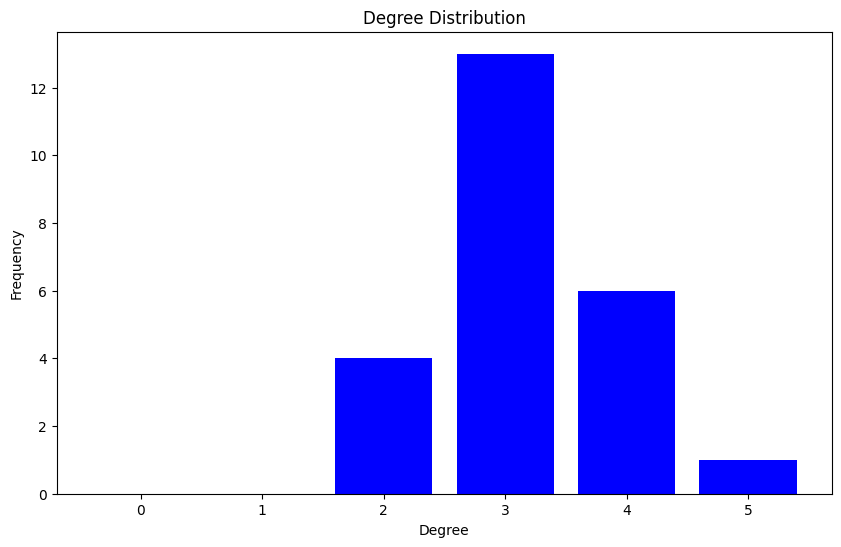

In [ ]:
analyze_graph(sioux_net)

In [ ]:
nx.degree_assortativity_coefficient(sioux_net)

0.211233211233209

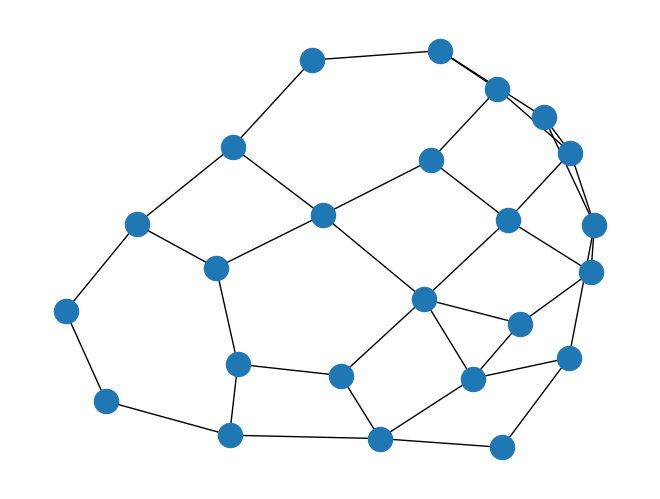

In [ ]:
nx.draw(sioux_net)

# Sydney

In [ ]:
# Turns sydney into a graph object
syd_net = nx.Graph()

# Add edges with attributes
for idx, row in Sydney.iterrows():
    syd_net.add_edge(row['init_node'], row['term_node'], **row.drop(['init_node', 'term_node']).to_dict())

Graph is not connected; diameter of the giant component will be calculated.
Diameter of the giant component: 239
Average Clustering Coefficient: 0.007416738930041882


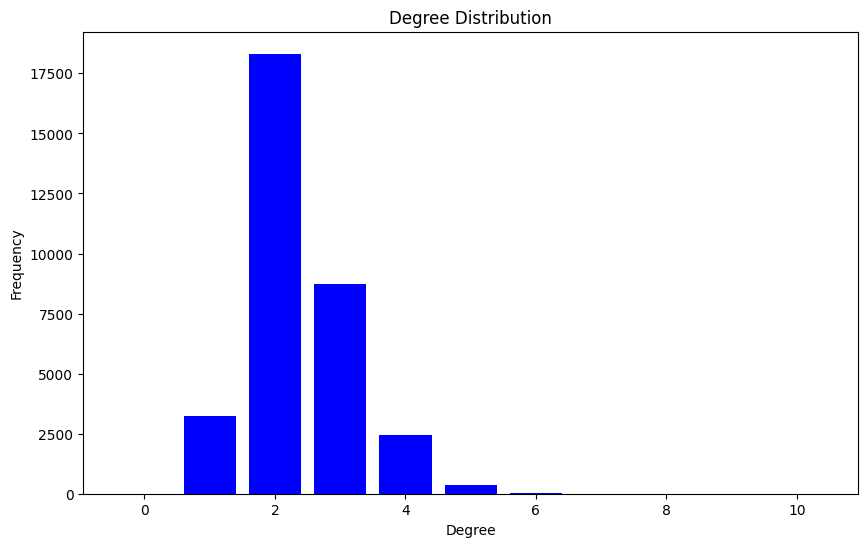

In [ ]:
analyze_graph(syd_net)

In [ ]:
nx.degree_assortativity_coefficient(syd_net)

-0.13574735903111876

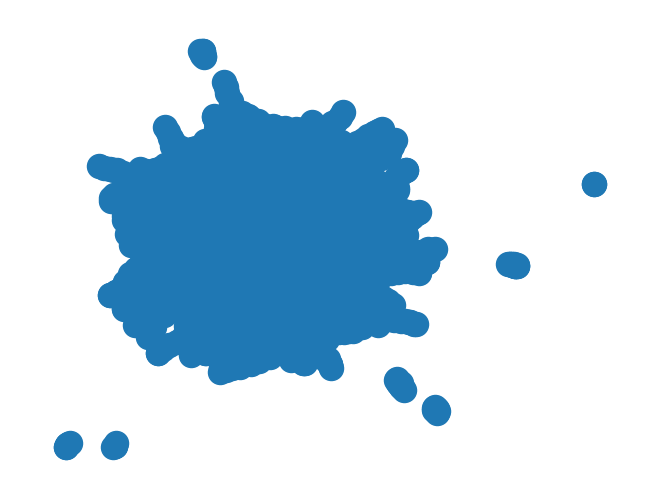

In [ ]:
nx.draw(syd_net)

# Winnipeg

In [ ]:
# Turns Winnipeg into a graph object
win_net = nx.Graph()

# Add edges with attributes
for idx, row in Winnipeg.iterrows():
    win_net.add_edge(row['init_node'], row['term_node'], **row.drop(['init_node', 'term_node']).to_dict())

Diameter of the graph: 37
Average Clustering Coefficient: 0.1044871794871793


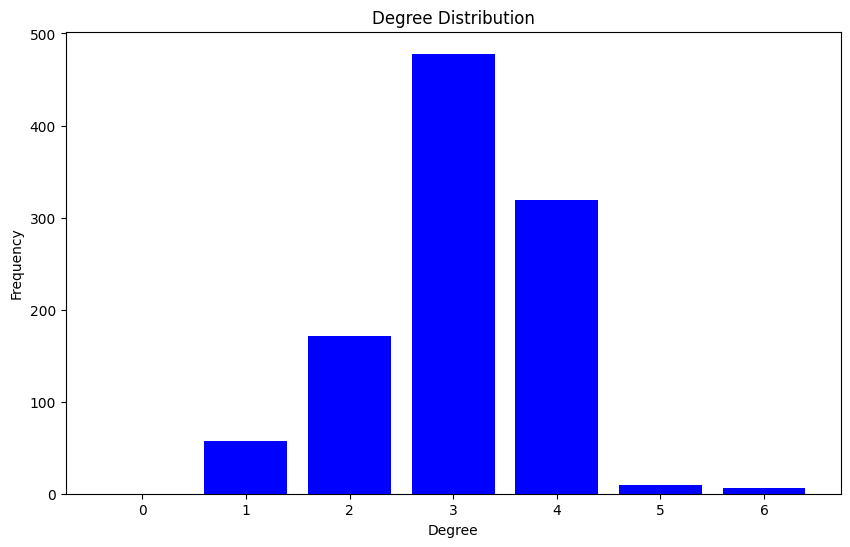

In [ ]:
analyze_graph(win_net)

In [ ]:
nx.degree_assortativity_coefficient(win_net)

0.3304145274060625

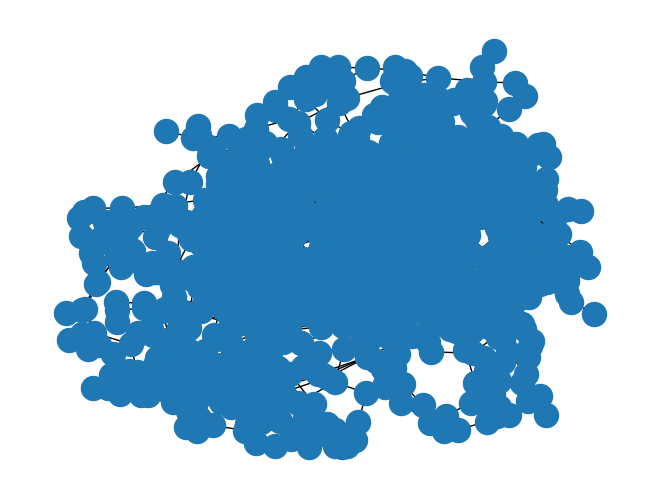

In [ ]:
nx.draw(win_net)